<a href="https://colab.research.google.com/github/fridymandita/TKB/blob/main/Data_Visualization_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data - COVID-19 datasets


## Datasets

In [1]:
# Basic imports that we will use throughout the notebook
import pathlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## New York Times

In [2]:
# Extract: download the data (here, load the CSV directly from the URL)
nytimes = pd.read_csv(
    'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv',
    index_col=['date'], parse_dates=['date']).asfreq(freq='D')

# Transform: add new columns with useful transformations
nytimes['new_cases'] = nytimes['cases'].diff()
nytimes['new_cases_ma7'] = nytimes['new_cases'].rolling(7).mean()

anomalous_dates = ['2020-09-21', '2020-11-26', '2020-12-11', '2020-12-25']
nytimes['anomaly'] = False
nytimes.loc[anomalous_dates, 'anomaly'] = True

# Load: save dataset as "us.parquet"
nytimes_path = pathlib.Path('./data/nytimes/')
nytimes_path.mkdir(parents=True, exist_ok=True)
nytimes.to_parquet(nytimes_path / 'us.parquet')

### Visualization: new cases

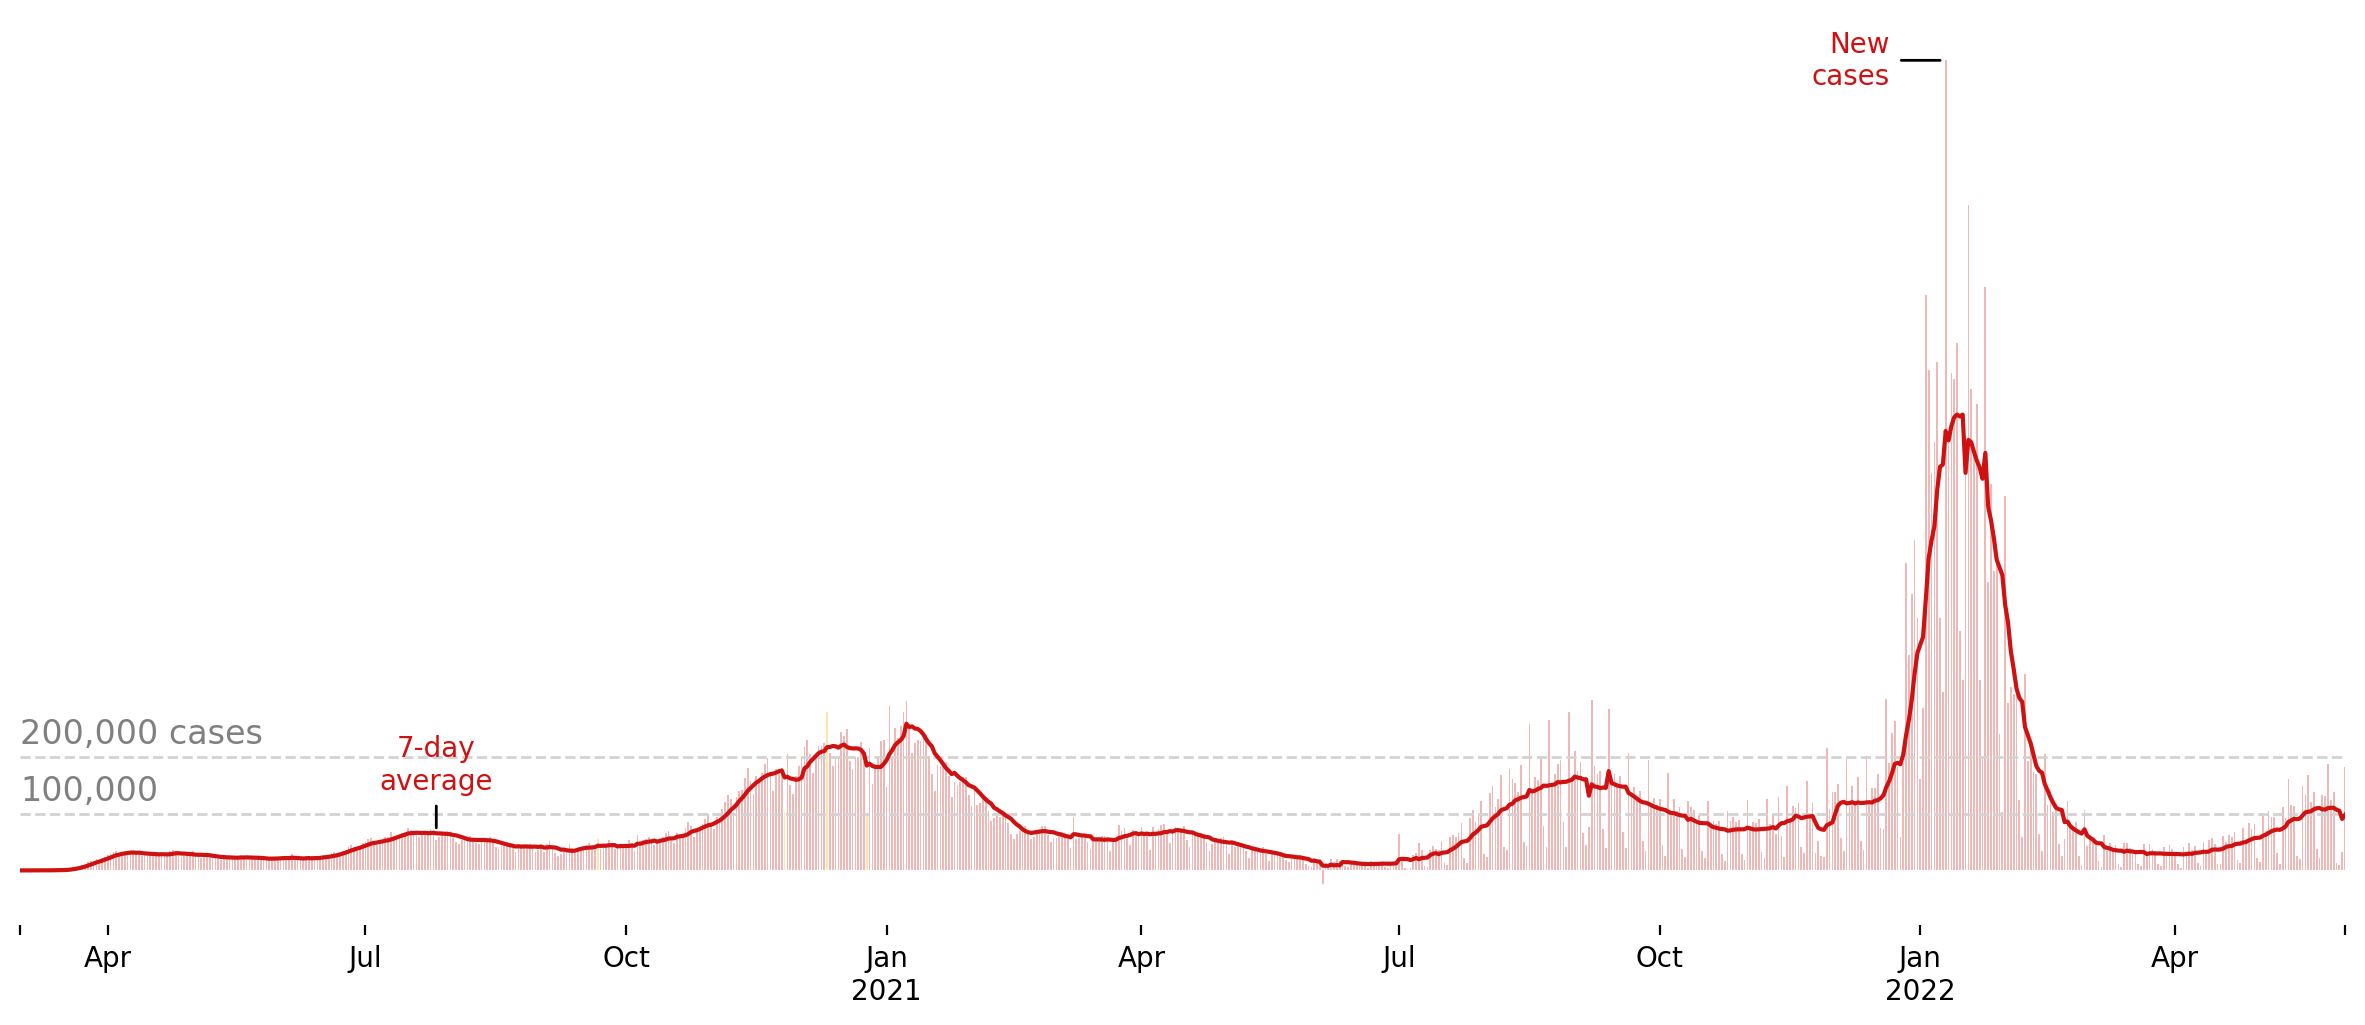

In [3]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=200)

# Colors
normal_color = '#cf1111'
anomaly_color = '#ffe4ad'

# Subset our data for plotting, and separate into normal and anomalous
to_plot = pd.read_parquet(
    nytimes_path / 'us.parquet',
    columns=['new_cases', 'new_cases_ma7', 'anomaly']).loc['2020-03':]
normal = to_plot.query('not anomaly')
anomalous = to_plot.query('anomaly')

# Add new cases rolling average and annotation
to_plot['new_cases_ma7'].plot(color=normal_color, ax=ax)

label_date = '2020-07-26'
ax.annotate('7-day\naverage',
            xy=(label_date, to_plot['new_cases_ma7'].loc[label_date]),
            xytext=(0, 16), textcoords='offset points',
            horizontalalignment='center',
            arrowprops=dict(arrowstyle="-"),
            color=normal_color)

# Add new cases bar plot and annotation
ax.bar(normal.index, normal['new_cases'], width=0.6, color=normal_color,
       alpha=0.3)
ax.bar(anomalous.index, anomalous['new_cases'], width=0.6, color=anomaly_color)

label_date = normal.index[normal.new_cases.argmax()]
ax.annotate('New\ncases',
            xy=(label_date, to_plot['new_cases'].loc[label_date]),
            xytext=(-20, 0), textcoords='offset points',
            horizontalalignment='right',
            verticalalignment='center',
            arrowprops=dict(arrowstyle="-"),
            color=normal_color)

# Add and annotate horizontal grid lines
ax.hlines(100_000, to_plot.index[0], to_plot.index[-1], color='lightgray',
          linestyle='--', linewidth=1)
ax.hlines(200_000, to_plot.index[0], to_plot.index[-1], color='lightgray',
          linestyle='--', linewidth=1)

ax.annotate('200,000 cases',
            xy=('2020-03-01', 200_000),
            xytext=(0, 5), textcoords='offset points',
            fontsize='large', color='gray')
ax.annotate('100,000',
            xy=('2020-03-01', 100_000),
            xytext=(0, 5), textcoords='offset points',
            fontsize='large', color='gray')

# Styling
[ax.spines[spine].set_visible(False)
 for spine in ['top', 'right', 'bottom', 'left']]
ax.yaxis.set_ticks([])
ax.minorticks_off()
ax.set_xlabel('');